# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

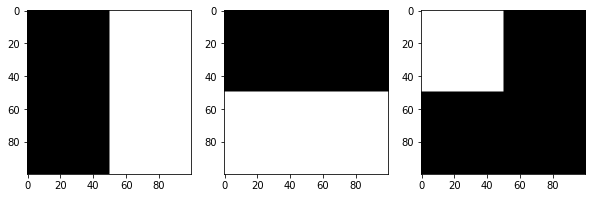

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


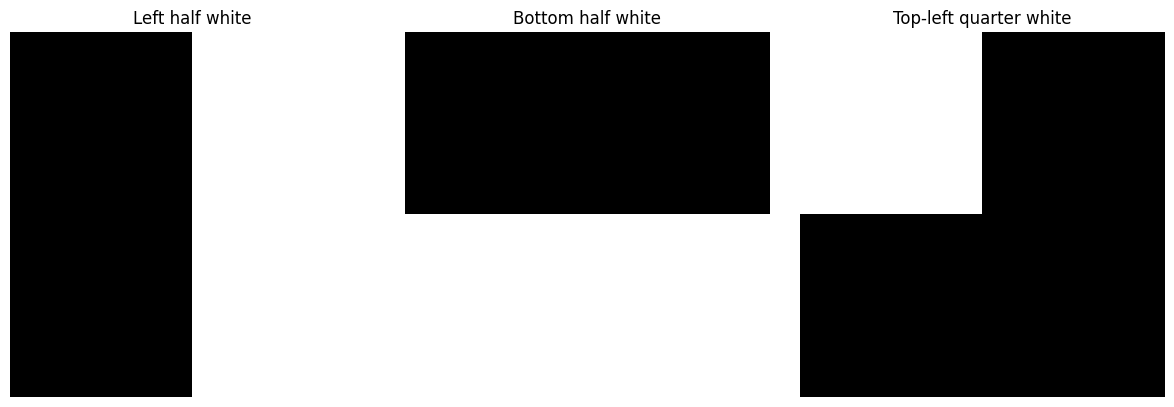

In [2]:


# Image 1: Left half black, right half white
img1 = np.zeros((100, 100), dtype=np.uint8)
img1[:, 50:] = 255

# Image 2: Top half black, bottom half white
img2 = np.zeros((100, 100), dtype=np.uint8)
img2[50:, :] = 255

# Image 3: Top-left quarter white, rest black
img3 = np.zeros((100, 100), dtype=np.uint8)
img3[:50, :50] = 255

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Left half white')
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Bottom half white')
axes[2].imshow(img3, cmap='gray')
axes[2].set_title('Top-left quarter white')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


*   Use the above three images to create the following image

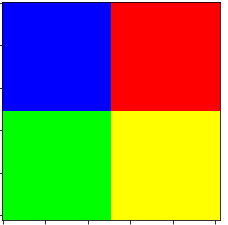
*Hint: Remember channels and color spaces*

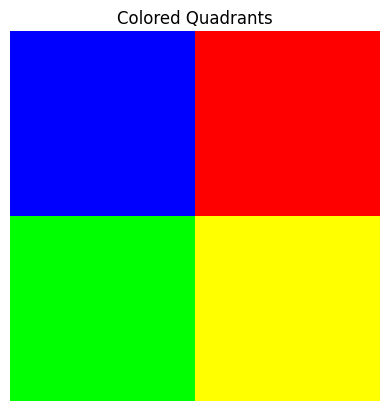

In [3]:
# solution
# Use img1, img2, img3 from previous cells

# Stack images as channels: R, G, B
# Top-left: Blue, Top-right: Red, Bottom-left: Green, Bottom-right: Yellow (Red+Green)

img_rgb = np.zeros((100, 100, 3), dtype=np.uint8)

# Blue channel: Top-left quarter
img_rgb[:50, :50, 2] = 255  # Blue

# Red channel: Top-right quarter
img_rgb[:50, 50:, 0] = 255  # Red

# Green channel: Bottom-left quarter
img_rgb[50:, :50, 1] = 255  # Green

# Yellow (Red+Green): Bottom-right quarter
img_rgb[50:, 50:, 0] = 255  # Red
img_rgb[50:, 50:, 1] = 255  # Green

plt.imshow(img_rgb)
plt.title('Colored Quadrants')
plt.axis('off')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

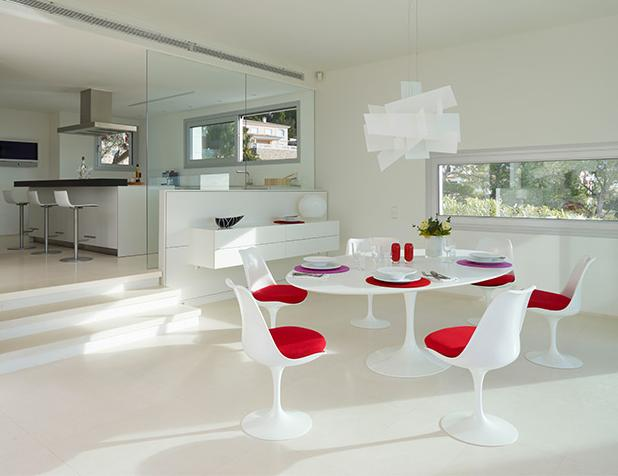

*   Extract individual channels and plot them using matplotlib subplot.



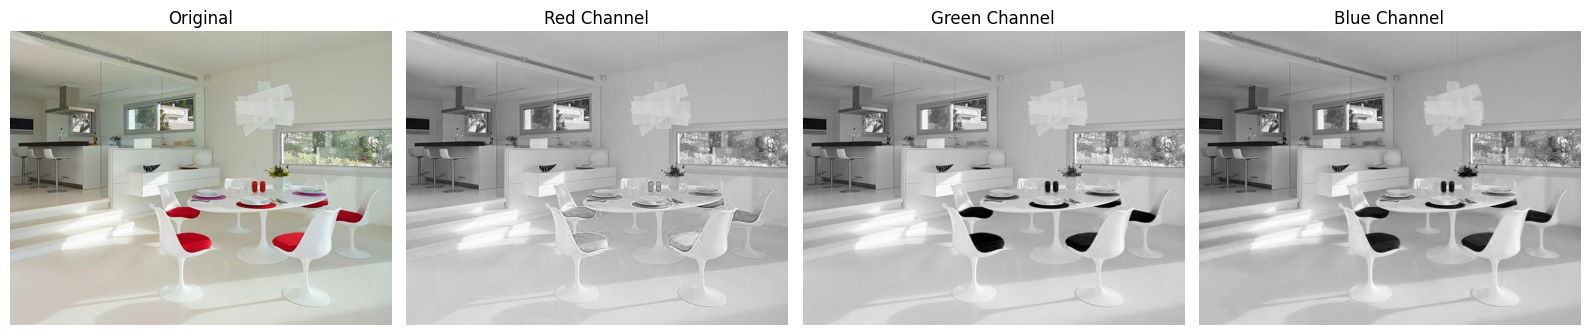

In [4]:
# solution
from skimage import io

# Read the image
img = io.imread('images/sillas.jpg')

# Extract channels
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Plot channels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(red_channel, cmap='gray')
axes[1].set_title('Red Channel')
axes[2].imshow(green_channel, cmap='gray')
axes[2].set_title('Green Channel')
axes[3].imshow(blue_channel, cmap='gray')
axes[3].set_title('Blue Channel')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

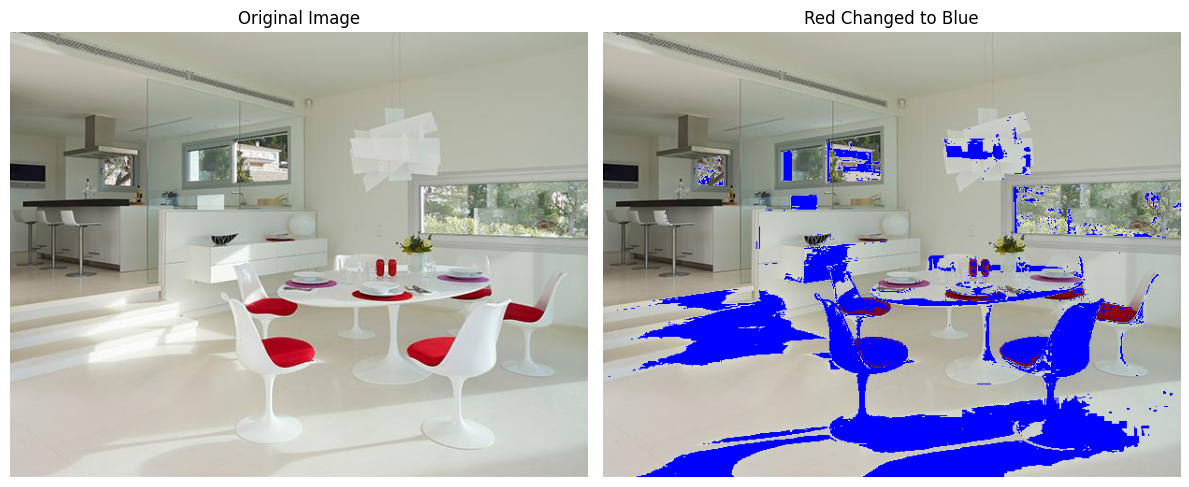

In [5]:
# solution
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = io.imread('images/sillas.jpg')

# Create a copy to modify
img_new = img.copy()

# Define a threshold for "red" pixels (red channel much higher than green and blue)
red_mask = (img[:, :, 0] > 150) & (img[:, :, 0] > img[:, :, 1] + 50) & (img[:, :, 0] > img[:, :, 2] + 50)

# Change "red" pixels to "blue"
img_new[red_mask, 0] = 0      # Red channel to 0
img_new[red_mask, 1] = 0      # Green channel to 0
img_new[red_mask, 2] = 255    # Blue channel to 255

# Plot original and modified images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(img_new)
axes[1].set_title('Red Changed to Blue')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

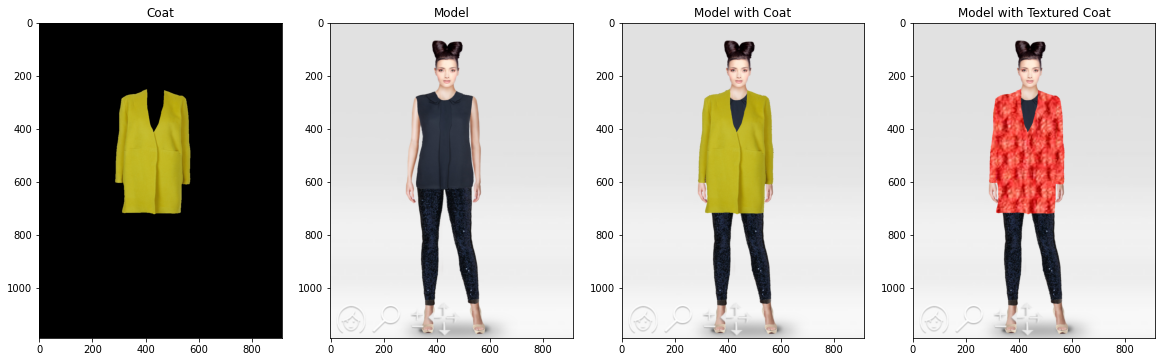

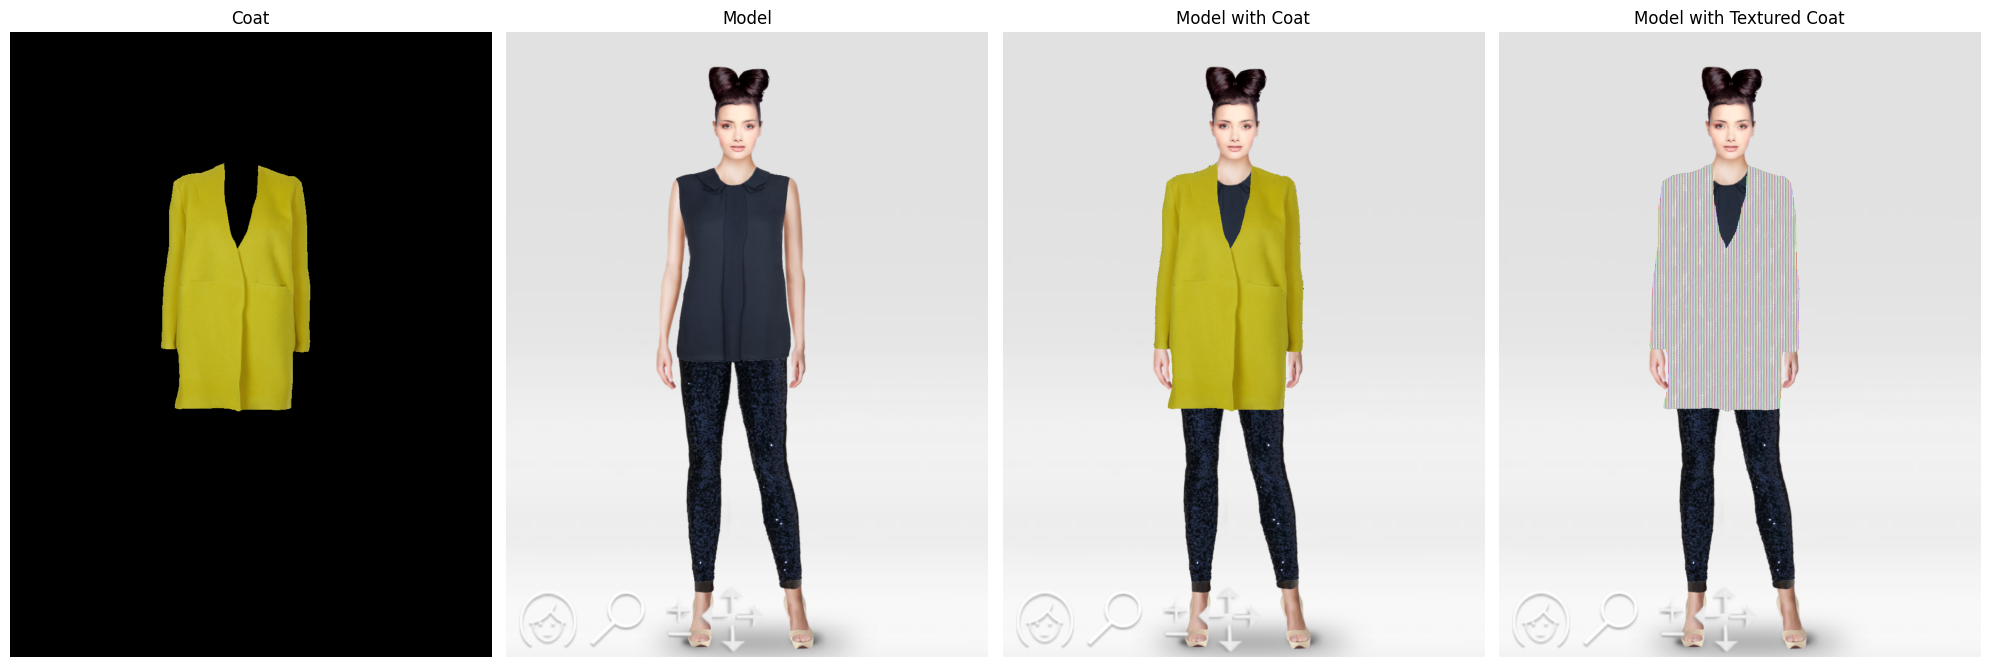

In [9]:
# solution
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Read images
model = io.imread('images/model.png')
coat = io.imread('images/coat.png')
texture = io.imread('images/texture2.png')  # Change filename for other textures

# Use only RGB channels for mask
coat_rgb = coat[..., :3]
coat_mask = np.any(coat_rgb != [0, 0, 0], axis=-1)

# Overlay coat on model
model_with_coat = model.copy()
model_with_coat[coat_mask] = coat[coat_mask]

# Overlay texture on coat area
textured_coat = coat.copy()
texture_resized = np.resize(texture, coat.shape)
textured_coat[coat_mask] = texture_resized[coat_mask]

model_with_textured_coat = model.copy()
model_with_textured_coat[coat_mask] = textured_coat[coat_mask]

# Plot all images
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
axes[0].imshow(coat)
axes[0].set_title('Coat')
axes[0].axis('off')
axes[1].imshow(model)
axes[1].set_title('Model')
axes[1].axis('off')
axes[2].imshow(model_with_coat)
axes[2].set_title('Model with Coat')
axes[2].axis('off')
axes[3].imshow(model_with_textured_coat)
axes[3].set_title('Model with Textured Coat')
axes[3].axis('off')
plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




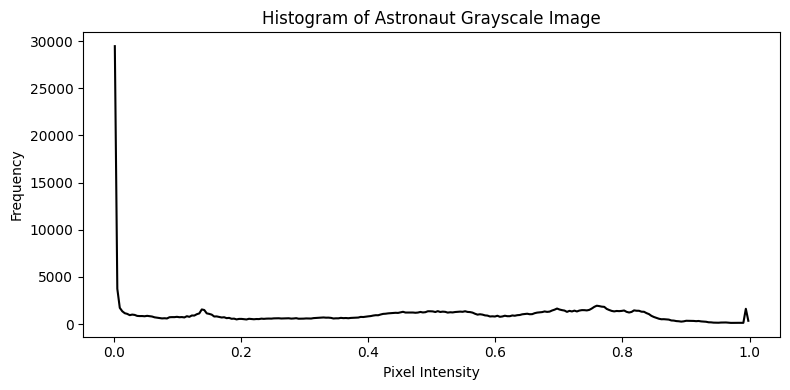

In [10]:
# solution
from skimage import data, color, exposure
import matplotlib.pyplot as plt

# Read the astronaut image
img = data.astronaut()

# Convert to grayscale
img_gray = color.rgb2gray(img)

# Compute histogram
hist, bins = exposure.histogram(img_gray)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.plot(bins, hist, color='black')
plt.title('Histogram of Astronaut Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

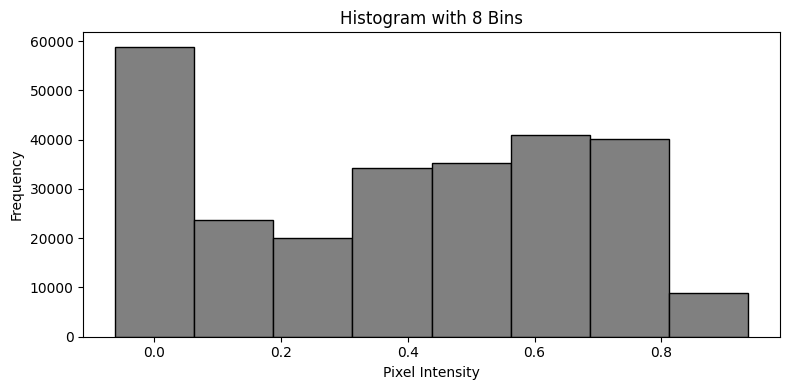

In [11]:
# solution
# solution
import numpy as np

# Compute histogram with 8 bins
hist, bins = np.histogram(img_gray, bins=8, range=(0, 1))

# Plot histogram
plt.figure(figsize=(8, 4))
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), color='gray', edgecolor='black')
plt.title('Histogram with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**


When you change the bin count, the histogram's granularity changes.  
- **Low bin count:** The histogram is coarse, and details are lost.
- **High bin count:** The histogram is more detailed, but may be noisy.

The correct bin count depends on the image and the analysis purpose.  
If you want to see overall intensity distribution, fewer bins may suffice.  
For detailed analysis, more bins are better.  
Too few bins hide details; too many bins may show random fluctuations.
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


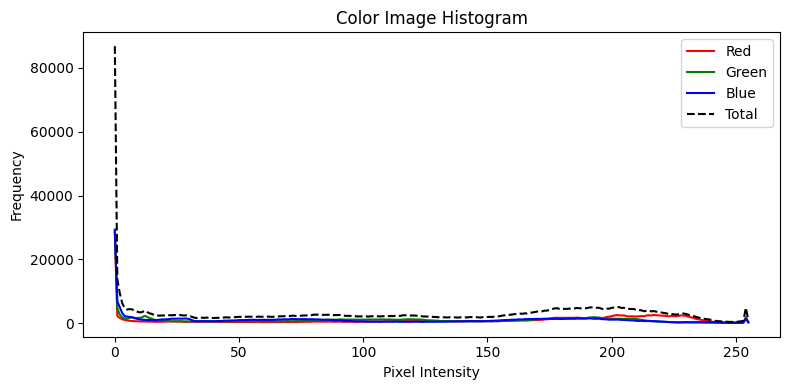

In [12]:
#solution
from skimage import data, exposure

# Use the astronaut image (already loaded as img)
colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']

plt.figure(figsize=(8, 4))
for i, color_name in enumerate(colors):
    hist, bins = exposure.histogram(img[..., i])
    plt.plot(bins, hist, color=color_name, label=labels[i])

# Total histogram (flattened)
hist_total, bins_total = exposure.histogram(img.ravel())
plt.plot(bins_total, hist_total, color='k', label='Total', linestyle='--')

plt.title('Color Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



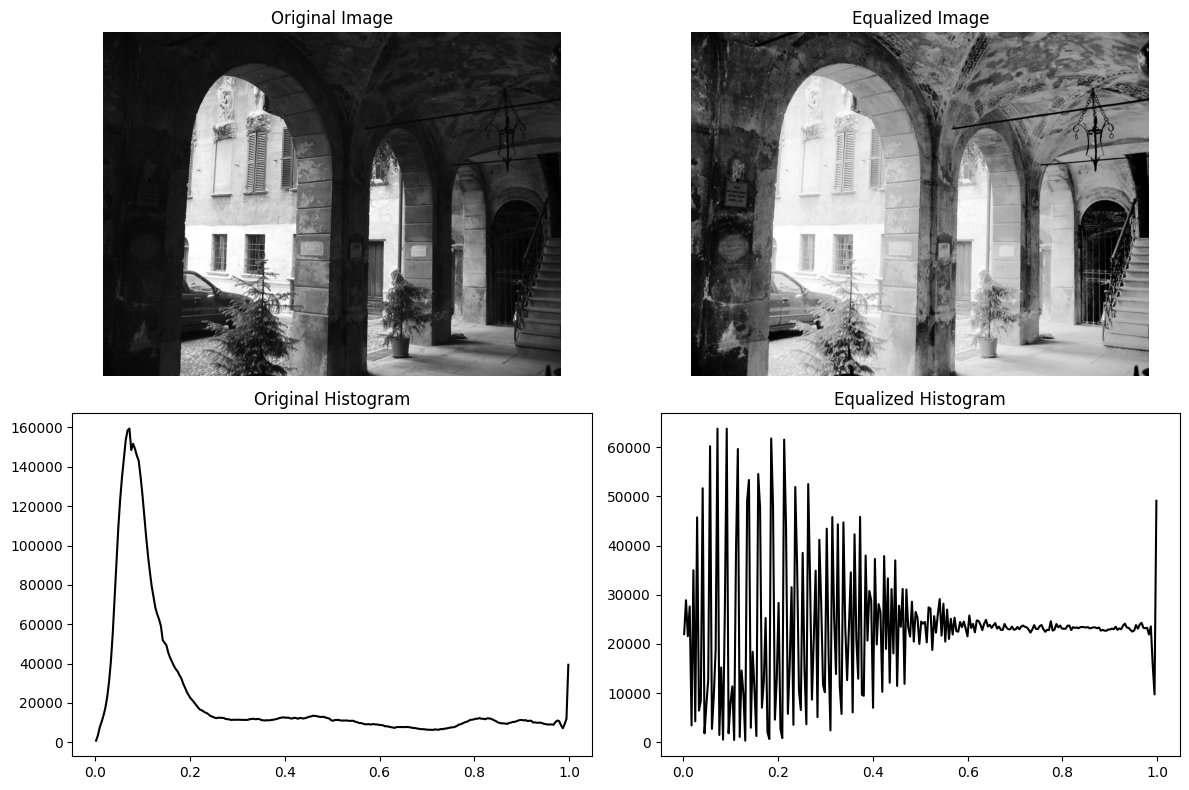

In [13]:
# solution
# solution
from skimage import io, exposure, color

# Read image
img = io.imread('images/aquatermi_lowcontrast.jpg')
img_gray = color.rgb2gray(img)

# Histogram of original
hist_orig, bins_orig = exposure.histogram(img_gray)

# Equalize histogram
img_eq = exposure.equalize_hist(img_gray)
hist_eq, bins_eq = exposure.histogram(img_eq)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].imshow(img_eq, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')
axes[1, 0].plot(bins_orig, hist_orig, color='black')
axes[1, 0].set_title('Original Histogram')
axes[1, 1].plot(bins_eq, hist_eq, color='black')
axes[1, 1].set_title('Equalized Histogram')
plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

**Solution**

Histogram equalization uses the cumulative distribution function (CDF) and interpolation to redistribute pixel intensities, enhancing contrast globally.  
Linear contrast stretch simply rescales pixel values linearly between the minimum and maximum, without considering the distribution.  
Equalization can reveal more details in images with poor contrast, while linear stretch only expands the range.
...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



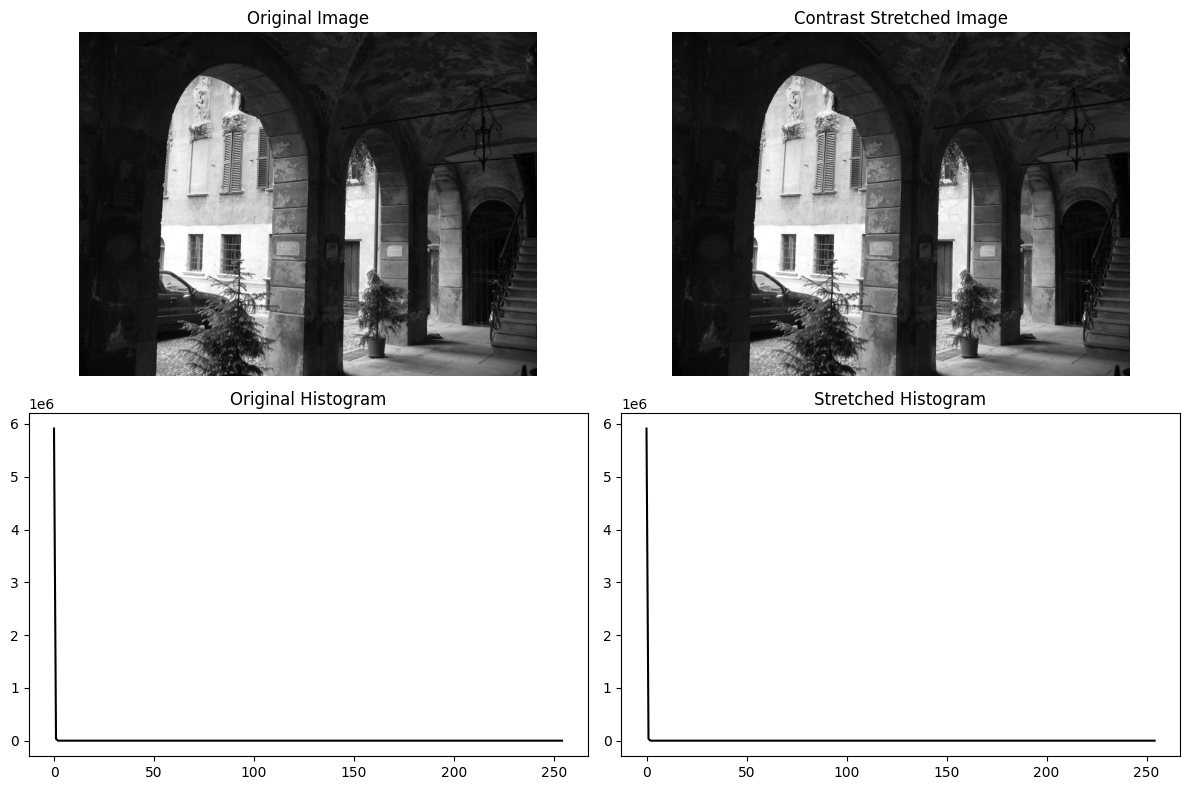

In [14]:
# solution
# solution
def linear_contrast_stretch(img_gray, bins=256):
    min_val = img_gray.min()
    max_val = img_gray.max()
    stretched = (img_gray - min_val) / (max_val - min_val)
    stretched = np.clip(stretched, 0, 1)
    return stretched

# Apply to aquatermi_lowcontrast.jpg
img = io.imread('images/aquatermi_lowcontrast.jpg')
img_gray = color.rgb2gray(img)
img_stretched = linear_contrast_stretch(img_gray)

# Histograms
hist_orig, bins_orig = np.histogram(img_gray, bins=bins, range=(0, 1))
hist_stretched, bins_stretched = np.histogram(img_stretched, bins=bins, range=(0, 1))

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].imshow(img_stretched, cmap='gray')
axes[0, 1].set_title('Contrast Stretched Image')
axes[0, 1].axis('off')
axes[1, 0].plot(bins_orig[:-1], hist_orig, color='black')
axes[1, 0].set_title('Original Histogram')
axes[1, 1].plot(bins_stretched[:-1], hist_stretched, color='black')
axes[1, 1].set_title('Stretched Histogram')
plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




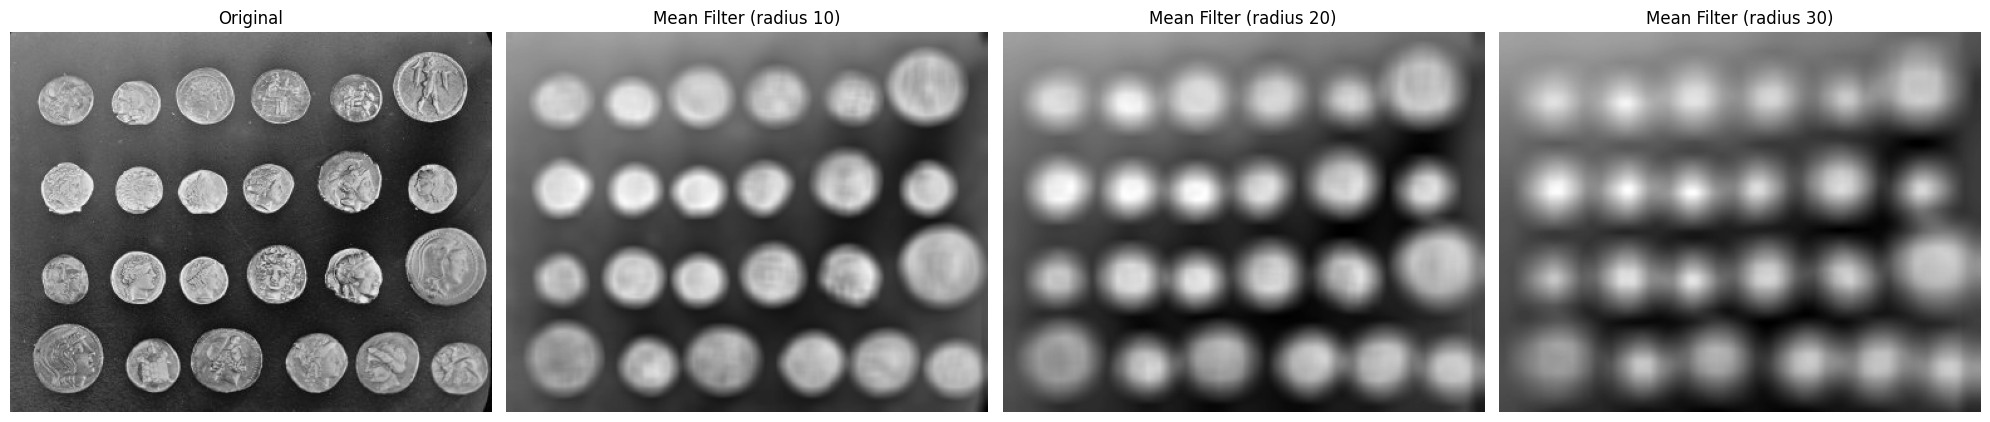

In [21]:
from skimage import data, morphology
import matplotlib.pyplot as plt
from scipy import ndimage

# Load coins image
coins = data.coins()

# Define disk structuring elements
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

# Apply mean filter
mean_20 = ndimage.uniform_filter(coins, size=(21, 21))
mean_30 = ndimage.uniform_filter(coins, size=(31, 31))
mean_10 = ndimage.uniform_filter(coins, size=(11, 11))

# Plot original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(mean_10, cmap='gray')
axes[1].set_title('Mean Filter (radius 10)')
axes[1].axis('off')
axes[2].imshow(mean_20, cmap='gray')
axes[2].set_title('Mean Filter (radius 20)')
axes[2].axis('off')
axes[3].imshow(mean_30, cmap='gray')
axes[3].set_title('Mean Filter (radius 30)')
axes[3].axis('off')
plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_71924/1117622777.py:10: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  ('Square', morphology.square(15)),
/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_71924/1117622777.py:11: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  ('Rectangle', morphology.rectangle(10, 20)),


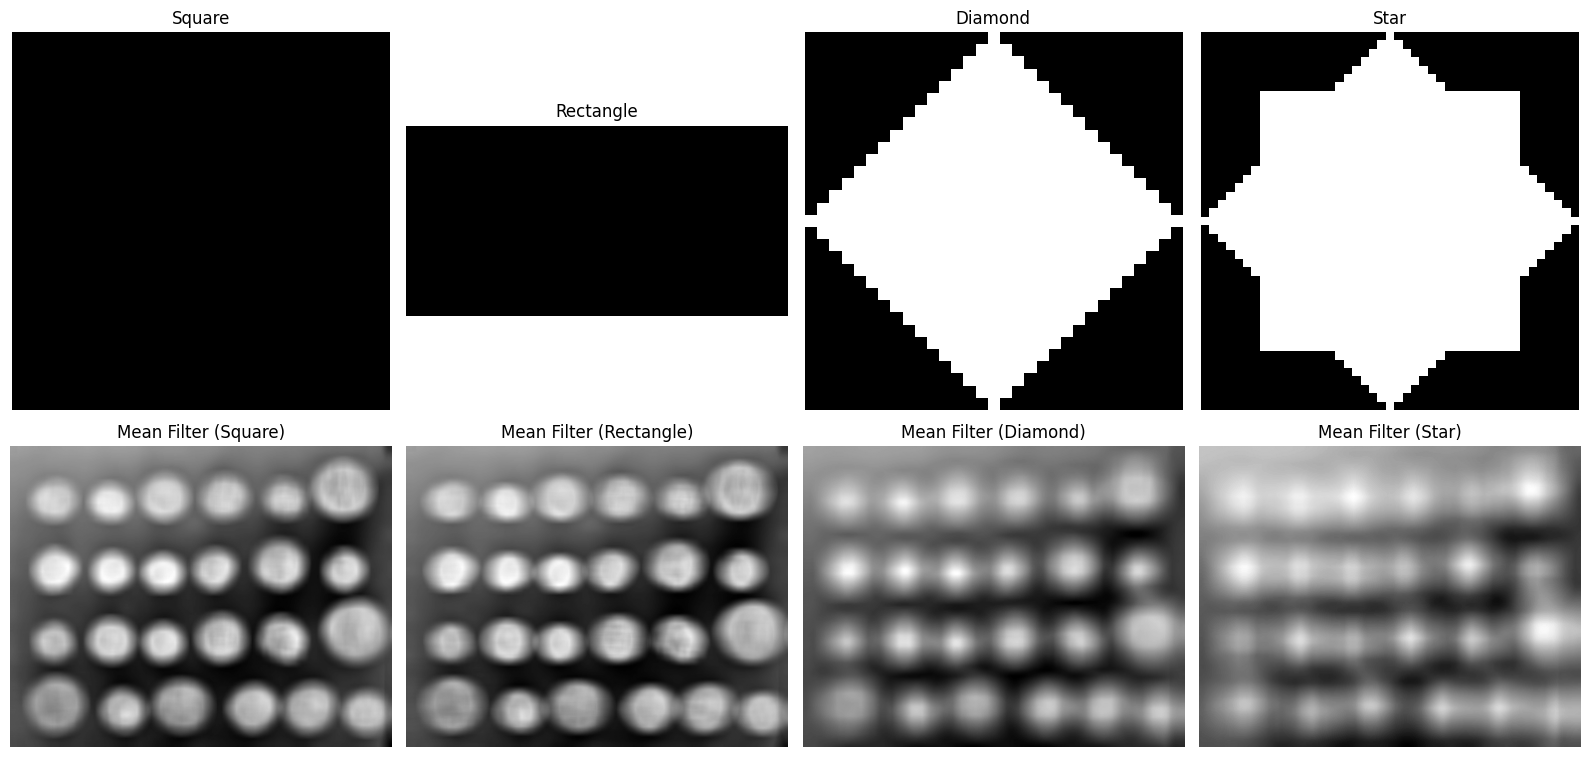

In [25]:
from skimage import data, morphology
import matplotlib.pyplot as plt
from scipy import ndimage

# Load coins image
coins = data.coins()

# Structuring elements
selems = [
    ('Square', morphology.square(15)),
    ('Rectangle', morphology.rectangle(10, 20)),
    ('Diamond', morphology.diamond(15)),
    ('Star', morphology.star(15))
]

# Apply mean filter for each selem
filtered_imgs = [ndimage.uniform_filter(coins, size=selem[1].shape) for selem in selems]

# Plot selem and filtered images
fig, axes = plt.subplots(2, len(selems), figsize=(16, 8))
for i, (name, selem) in enumerate(selems):
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(name)
    axes[0, i].axis('off')
    axes[1, i].imshow(filtered_imgs[i], cmap='gray')
    axes[1, i].set_title(f'Mean Filter ({name})')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**



Increasing the disk radius makes the mean filter smoother, reducing noise and small details.  
A larger radius averages over a bigger area, so the image becomes more blurred.  
A smaller radius preserves more details but smooths less.
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**


Different structuring elements affect the shape and extent of smoothing.  
Square and rectangle produce blocky smoothing, diamond and star create more rounded or pointed effects.  
The choice of structuring element can emphasize or suppress features depending on their shape.
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**


Mean filter replaces each pixel with the average of its neighbors, resulting in uniform smoothing.  
Gaussian filter uses a weighted average, giving more importance to central pixels, which preserves edges better.

Mean filters are used for basic noise reduction.  
Gaussian filters are preferred when you want to smooth while preserving edges and natural transitions.
...